In [120]:
#importing required libraries
import pandas as pd
import numpy as np

In [121]:
scrapped_data = pd.read_csv('Data Files\Final_Scrapped_Data.csv')

In [122]:
scrapped_data.shape

(2357, 8)

In [123]:
scrapped_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job_Title', 'Company', 'Job_Location',
       'Salaries', 'Job_Link', 'Job_Description'],
      dtype='object')

In [124]:
req_data = scrapped_data[['Job_Title','Salaries','Job_Description']]

In [125]:
req_data = req_data.dropna()
req_data = req_data.reset_index(drop=True)

In [126]:
req_data.dtypes

Job_Title          object
Salaries           object
Job_Description    object
dtype: object

In [127]:
req_data['Salaries'] = req_data['Salaries'].str.replace("$","")

In [128]:
req_data['Salaries'] = req_data['Salaries'].str.replace(",","")

In [129]:
req_data.head(10)

,Job_Title,Salaries,Job_Description
0,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...
1,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...
2,Dynamics 365 Business Analyst / Functional Con...,80000 a year,We're looking for great people so together we ...
3,JUNIOR BUSINESS ANALYST,1258 - 1584 a week,About the Cluster\n\nThe Labour and Transporta...
4,Business Analyst,39.50 an hour,"Evaluating business processes, anticipating re..."
5,Business Analyst,75000 - 80000 a year,Airfoam Industries Ltd is a market leader in t...
6,Data Visualization Business Analyst (Temporary...,39.67 an hour,Do you love using your data skills to find out...
7,Business Analyst,42 an hour,"TEI Inc. is looking for a full-time, permanent..."
8,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...
9,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...


In [130]:
req_data['Mean_sal'] = pd.DataFrame(req_data['Salaries'].str.findall('(\d+)').values.tolist(),
                              index=req_data.index).astype(float).mean(1)

In [131]:
req_data.head(10)

,Job_Title,Salaries,Job_Description,Mean_sal
0,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...,70000.0
1,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...,80000.0
2,Dynamics 365 Business Analyst / Functional Con...,80000 a year,We're looking for great people so together we ...,80000.0
3,JUNIOR BUSINESS ANALYST,1258 - 1584 a week,About the Cluster\n\nThe Labour and Transporta...,1421.0
4,Business Analyst,39.50 an hour,"Evaluating business processes, anticipating re...",44.5
5,Business Analyst,75000 - 80000 a year,Airfoam Industries Ltd is a market leader in t...,77500.0
6,Data Visualization Business Analyst (Temporary...,39.67 an hour,Do you love using your data skills to find out...,53.0
7,Business Analyst,42 an hour,"TEI Inc. is looking for a full-time, permanent...",42.0
8,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...,70000.0
9,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...,80000.0


In [132]:
hour_sal = req_data['Salaries'].str.contains('hour')
week_sal = req_data['Salaries'].str.contains('week')
month_sal = req_data['Salaries'].str.contains('month')

In [133]:
req_data['Final_Salary'] =np.select([hour_sal, week_sal,month_sal ], 
                          [req_data['Mean_sal'] * 1920,req_data['Mean_sal'] * 52,req_data['Mean_sal'] * 12], default=req_data['Mean_sal'])


In [134]:
req_data['Final_Salary']

0       70000.0
1       80000.0
2       80000.0
3       73892.0
4       85440.0
         ...   
992     60480.0
993    120000.0
994     80000.0
995     38400.0
996     64500.0
Name: Final_Salary, Length: 997, dtype: float64

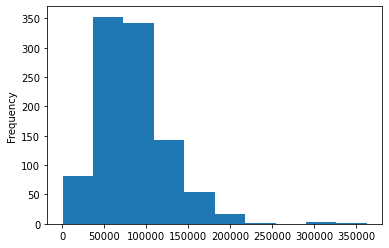

In [135]:
req_data['Final_Salary'].plot(kind='hist')

In [136]:
#Create Bins
BINS = [0,50000,70000,90000,120000,150000,400000]

# 0 - below 50k
# 1 - 50k - 70k
# 2 - 70k - 90k
# 3 - 90k - 120k
# 4 - 120k - 150k
# 5 - 150k - 400k

In [137]:
req_data['Salary_BINS']= pd.cut(x=req_data['Final_Salary'], bins=BINS, labels=False)

# Model Building